# DATA ANALYSIS

## DATASET : 
## Historique des matchs internationaux de football depuis 1872

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
results = pd.read_csv("results.csv",sep=",")

In [6]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41635,2020-09-08,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False
41636,2020-09-08,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False
41637,2020-09-08,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False
41638,2020-09-08,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False


In [7]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [11]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41635,2020-09-08,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False
41636,2020-09-08,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False
41637,2020-09-08,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False
41638,2020-09-08,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False
41639,2020-09-08,San Marino,Liechtenstein,0,2,UEFA Nations League,Rimini,Italy,True


In [8]:
nb_lignes, nb_col = results.shape
print(nb_lignes)
print(nb_col)

41640
9


In [9]:
results.describe()

,home_score,away_score
count,41640.000000,41640.000000
mean,1.744813,1.187680
std,1.753365,1.404828
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [12]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [13]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [14]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 9 columns):
date          41640 non-null object
home_team     41640 non-null object
away_team     41640 non-null object
home_score    41640 non-null int64
away_score    41640 non-null int64
tournament    41640 non-null object
city          41640 non-null object
country       41640 non-null object
neutral       41640 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


### ANALYSE DES DONNEES

#### 1) Liste de tous les matchs de l'équipe de France : 

In [21]:
results[(results.home_team=="France") | (results.away_team=="France")]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
162,1904-05-01,Belgium,France,3,3,Friendly,Brussels,Belgium,False
164,1905-02-12,France,Switzerland,1,0,Friendly,Paris,France,False
173,1905-05-07,Belgium,France,7,0,Friendly,Brussels,Belgium,False
183,1906-04-22,France,Belgium,0,5,Friendly,Saint-Cloud,France,False
198,1907-04-21,Belgium,France,1,2,Friendly,Brussels,Belgium,False
...,...,...,...,...,...,...,...,...,...
41304,2019-10-14,France,Turkey,1,1,UEFA Euro qualification,Paris,France,False
41402,2019-11-14,France,Moldova,2,1,UEFA Euro qualification,Paris,France,False
41483,2019-11-17,Albania,France,0,2,UEFA Euro qualification,Tirana,Albania,False
41607,2020-09-05,Sweden,France,0,1,UEFA Nations League,Stockholm,Sweden,False


#### Nombre de matchs joués par l'équipe de France: 

In [63]:
results[(results.home_team=="France") | (results.away_team=="France")].shape[0]

842

#### 2) Nombre de victoires à domicile, Nombre de victoires à l'exterieure, et Nombre de matchs nuls

In [82]:
data = results[results.neutral==False] #on ne compte pas les matchs où aucune des 2 equipes joue à domicile
away_team_won=data[data.away_score>data.home_score]
home_team_won=data[data.home_score>data.away_score]
draw=data[data.home_score==data.away_score]
print("Nb de victoires pour l'équipe à domicile : ", home_team_won.shape[0] )
print("Nb de victoire pour l'équipe à l'extérieur : ", away_team_won.shape[0] )
print("Nb de matchs nuls : ", draw.shape[0] )

Nb de victoires pour l'équipe à domicile :  15819
Nb de victoire pour l'équipe à l'extérieur :  8290
Nb de matchs nuls :  7247


#### 3) TOP 10 des équipes avec le plus de victoires

In [87]:
def find_winner(row):
    if row['home_score'] == row['away_score']:
        val = 'NA'
    elif row['home_score'] > row['away_score']:
        val = row['home_team']
    else:
        val = row['away_team']
    return val

In [89]:
results['team_winning'] = results.apply(find_winner, axis=1)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,nombre,resultat,home_result,team_winning
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,1,N,N,NA
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,1,N,V,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,1,N,V,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,1,N,N,NA
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,1,N,V,Scotland


In [106]:
# 10 equipes qui ont le plus de victoires de l'histoire
results[(results.team_winning != "NA")].groupby("team_winning").nombre.sum().sort_values(ascending=False)[:10]

team_winning
Brazil         625
England        573
Germany        555
Argentina      526
Sweden         500
South Korea    454
Mexico         439
Hungary        435
Italy          424
France         419
Name: nombre, dtype: int64

In [109]:
# 10 equipes qui ont le plus de victoires en 2010
results[(results.year==2010)&(results.team_winning != "NA")].groupby("team_winning").nombre.sum().sort_values(ascending=False)[:10]

team_winning
Netherlands    15
Spain          13
Argentina      12
Germany        12
Kuwait         11
Chile          10
Mexico         10
South Korea    10
Brazil          9
Egypt           9
Name: nombre, dtype: int64

#### 3) TOP 5 des années avec le plus de matchs

In [174]:
# top 5 des années avec le plus de matchs 
results.groupby("year").nombre.sum().sort_values(ascending=False)[:5]

year
2019    1155
2008    1091
2011    1081
2004    1064
2000    1026
Name: nombre, dtype: int64

In [123]:
results[(results.year==2011)].shape[0]

1081

#### 4) NB de but moyen à domicile et exterieur et nombre de but max

In [176]:
results.agg({'home_score' : [ 'max', 'mean'], 'away_score' : ['max', 'mean']})

,home_score,away_score
max,31.000000,21.00000
mean,1.744813,1.18768


### GRAPHIQUE NUMERO 1: Evolution du nombre de matchs par année

In [32]:
results['date'] = pd.to_datetime(results['date'])

results['year']=results['date'].dt.year

results['nombre']=1

In [49]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,nombre
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,1
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,1
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,1
...,...,...,...,...,...,...,...,...,...,...,...
41635,2020-09-08,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False,2020,1
41636,2020-09-08,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False,2020,1
41637,2020-09-08,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False,2020,1
41638,2020-09-08,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False,2020,1


In [172]:
plt.rcParams['figure.figsize'] = [15, 6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce
xcoords = [1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018]
thislist= []
for i in range(len(xcoords)) :
    thislist.append(results.groupby("year").nombre.sum().values[xcoords[i]-1872])
    
print(thislist)
print(xcoords)

[433, 570, 698, 760, 838, 854, 860, 905]
[1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018]


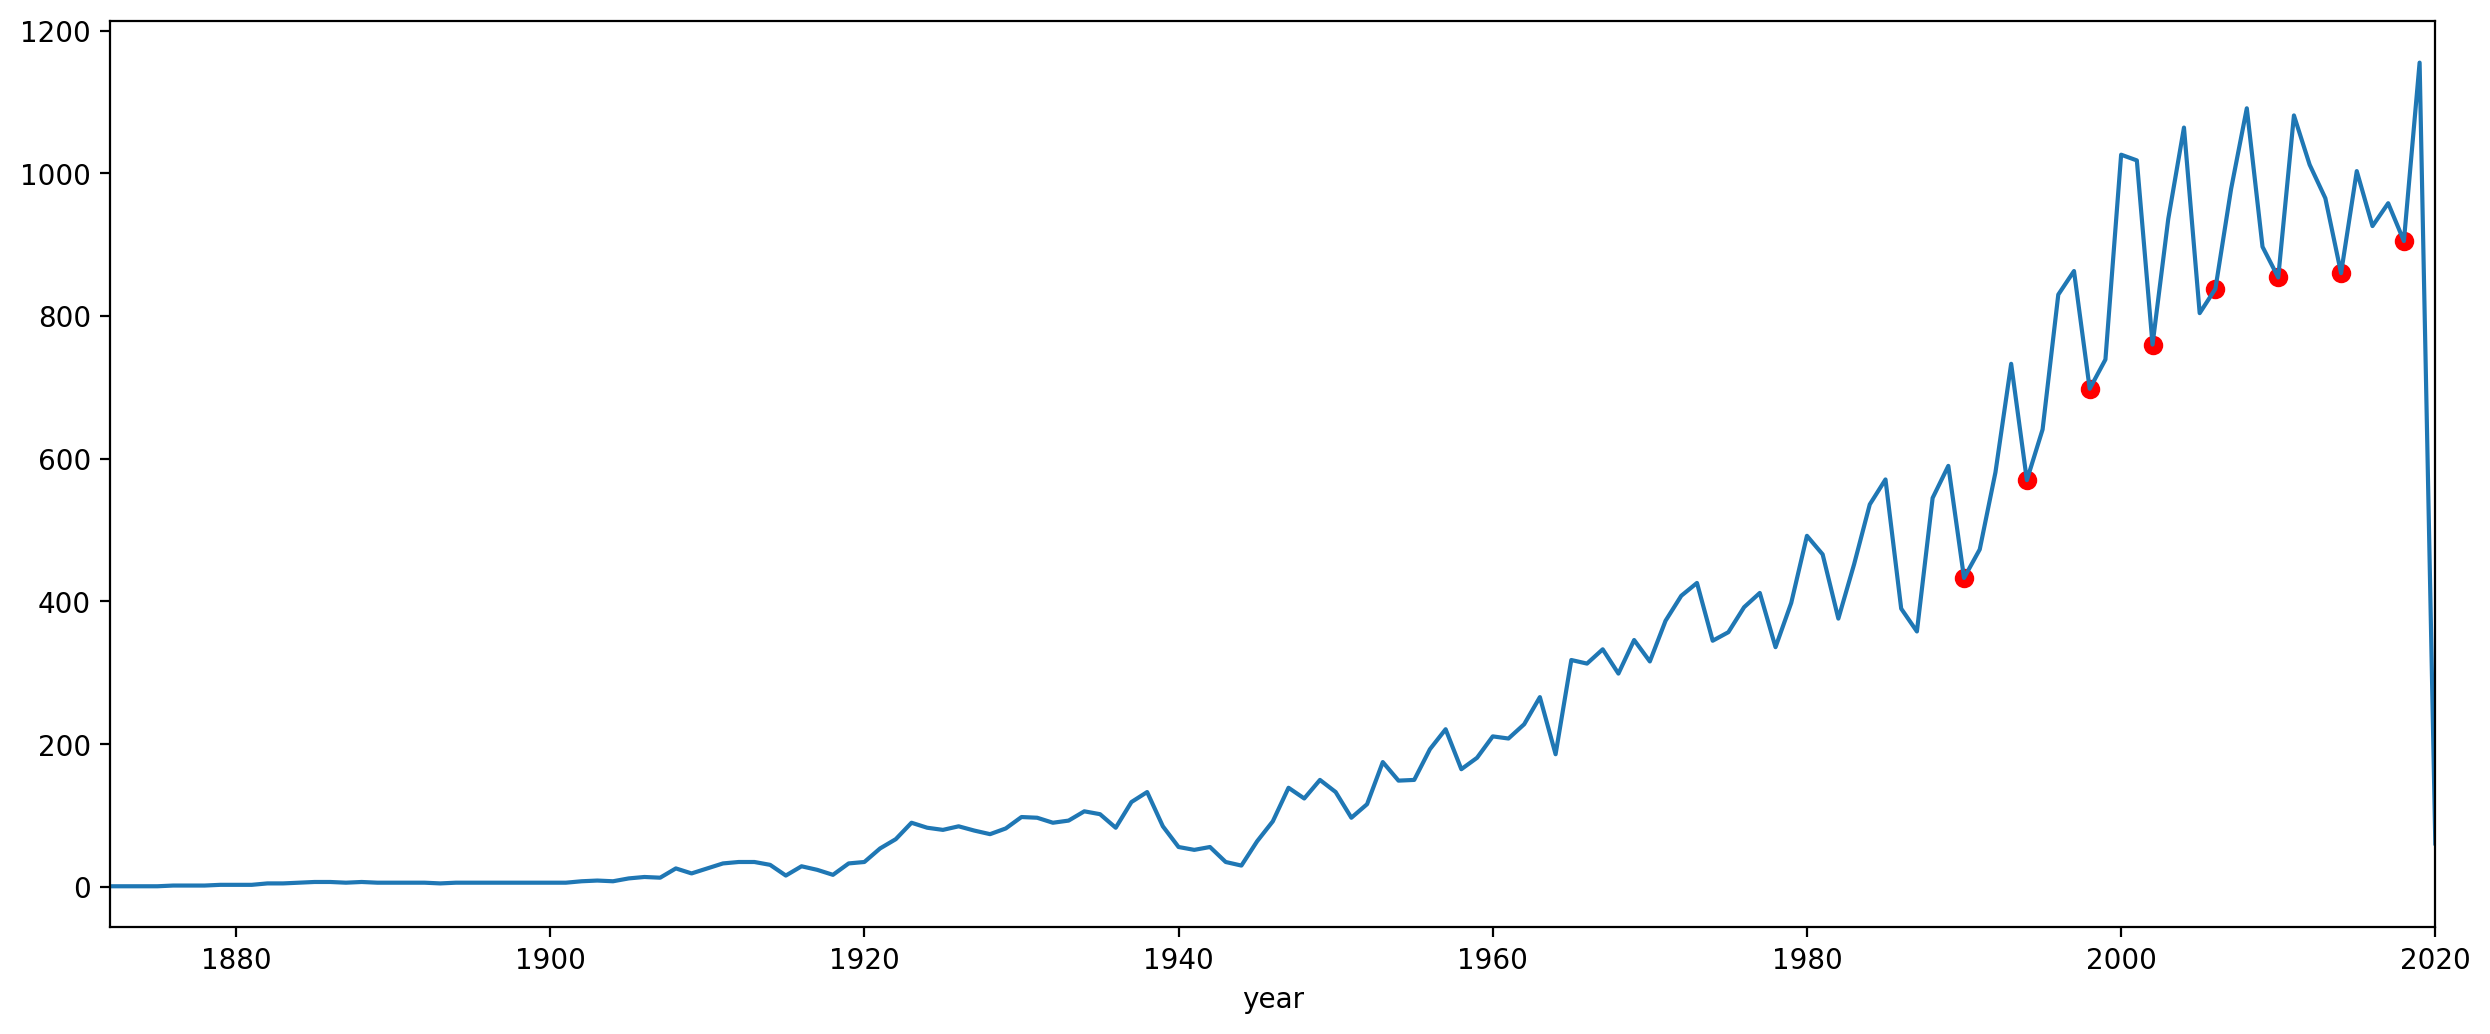

In [173]:
plt.scatter(x=xcoords,y=thislist,color='r')
results.groupby("year").nombre.sum().plot()

On peut voir plusieurs choses interessantes : 

- On remarque une forte augmentation du nombre de matchs à partir des années 80.

- On apperçoit clairement un creux pendant la période de la seconde guerre mondiale.

- Il y a des pics en fonction des années. Cela doit être à la présence ou non de certains évènements. Et étonnamment, les années de coupe du monde sont celles où il y a le moins de matchs.

### GRAPHIQUE NUMERO 2 : Histogramme nombre de match par competition 

In [35]:
results['tournament'].value_counts()

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
Dragon Cup                                  4
OSN Cup                                     4
AFF Championship qualification              2
Copa América qualification                  2
Atlantic Heritage Cup                       2
Name: tournament, Length: 112, dtype: int64

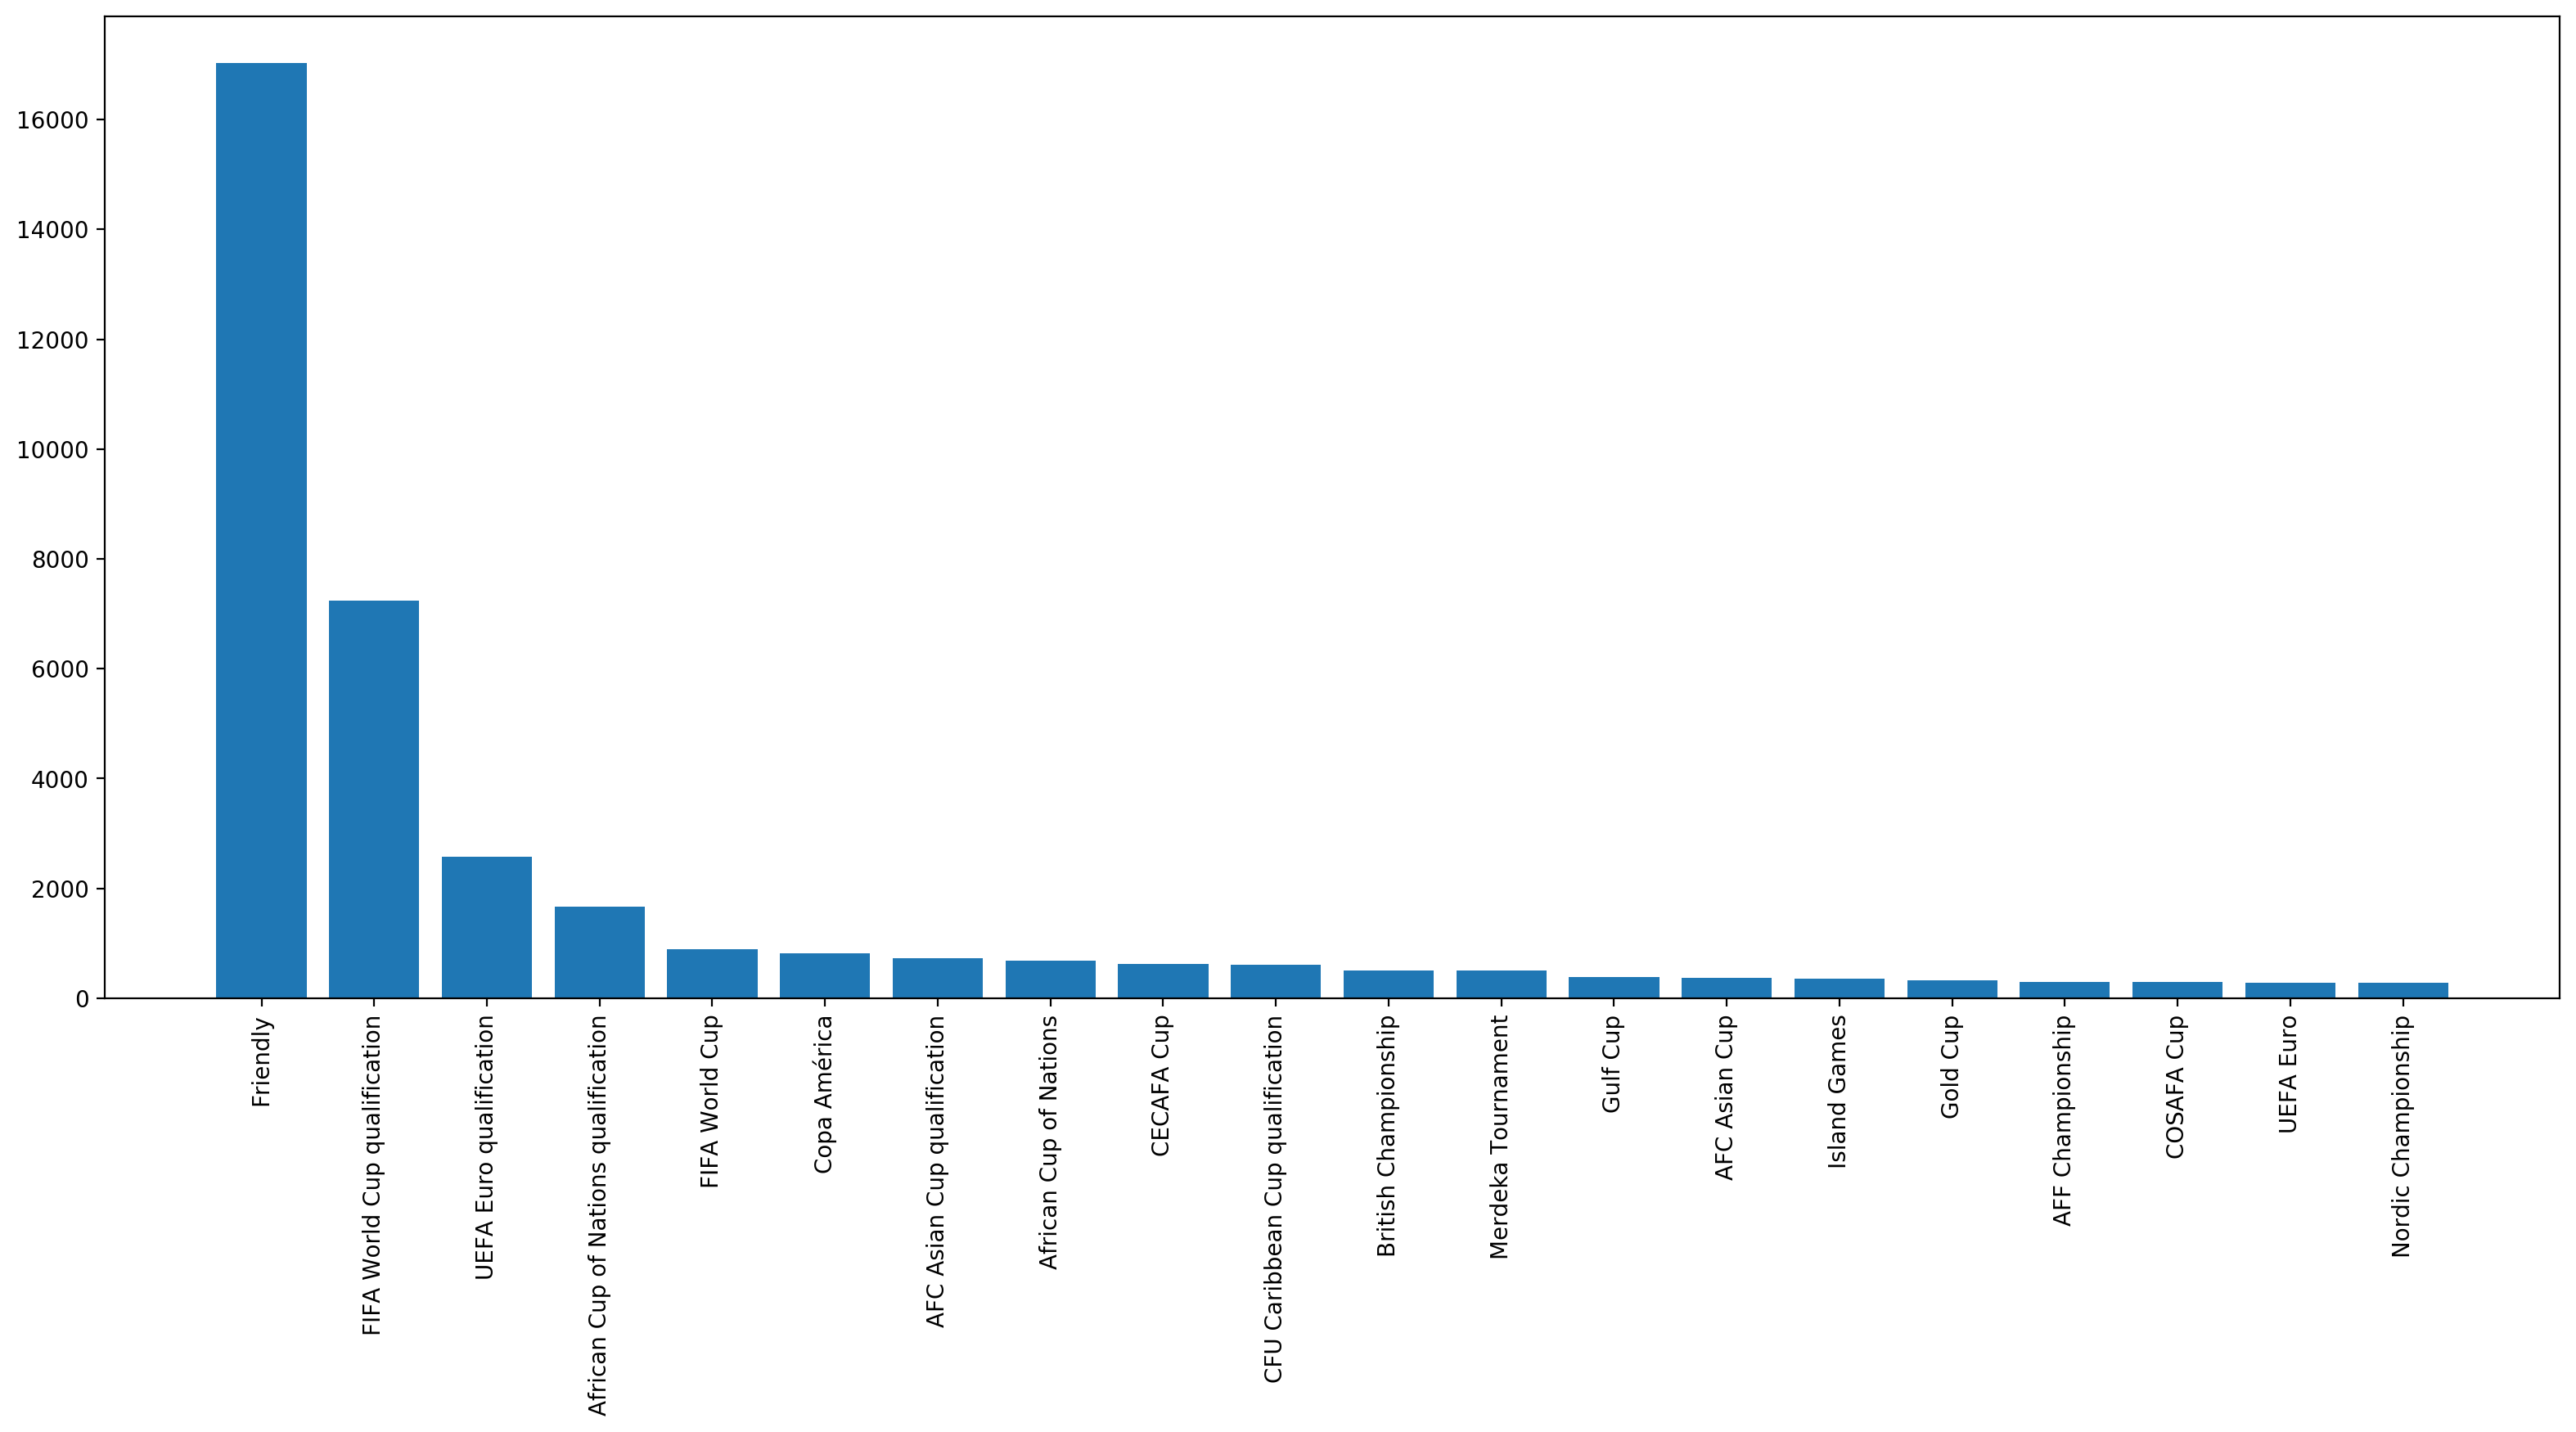

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(results['tournament'].value_counts().index[:20],results['tournament'].value_counts().values[:20])
plt.xticks(rotation=90)
plt.show()


### GRAPHIQUE NUMERO 3 : PIVOT 

In [79]:
def f(row):
    if row['home_score'] == row['away_score']:
        val = 'N'
    elif row['home_score'] > row['away_score']:
        val = 'V'
    else:
        val = 'D'
    return val


results['home_result'] = results.apply(f, axis=1)
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,nombre,resultat,home_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,1,N,N
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,1,N,V
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,1,N,V
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,1,N,N
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,1,N,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41635,2020-09-08,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False,2020,1,N,D
41636,2020-09-08,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False,2020,1,N,D
41637,2020-09-08,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False,2020,1,N,V
41638,2020-09-08,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False,2020,1,N,N


In [76]:
home_resultats = results[results.neutral==False]
home_resultats=home_resultats.pivot_table('nombre',index='year',columns='home_result',aggfunc=sum)
home_resultats

home_result,D,N,V
year,,,
1872,NaN,1.0,NaN
1873,NaN,NaN,1.0
1874,NaN,NaN,1.0
1875,NaN,1.0,NaN
1876,NaN,NaN,2.0
...,...,...,...
2016,168.0,156.0,353.0
2017,182.0,179.0,340.0
2018,156.0,151.0,300.0


In [77]:
home_resultats.fillna(0)

home_result,D,N,V
year,,,
1872,0.0,1.0,0.0
1873,0.0,0.0,1.0
1874,0.0,0.0,1.0
1875,0.0,1.0,0.0
1876,0.0,0.0,2.0
...,...,...,...
2016,168.0,156.0,353.0
2017,182.0,179.0,340.0
2018,156.0,151.0,300.0


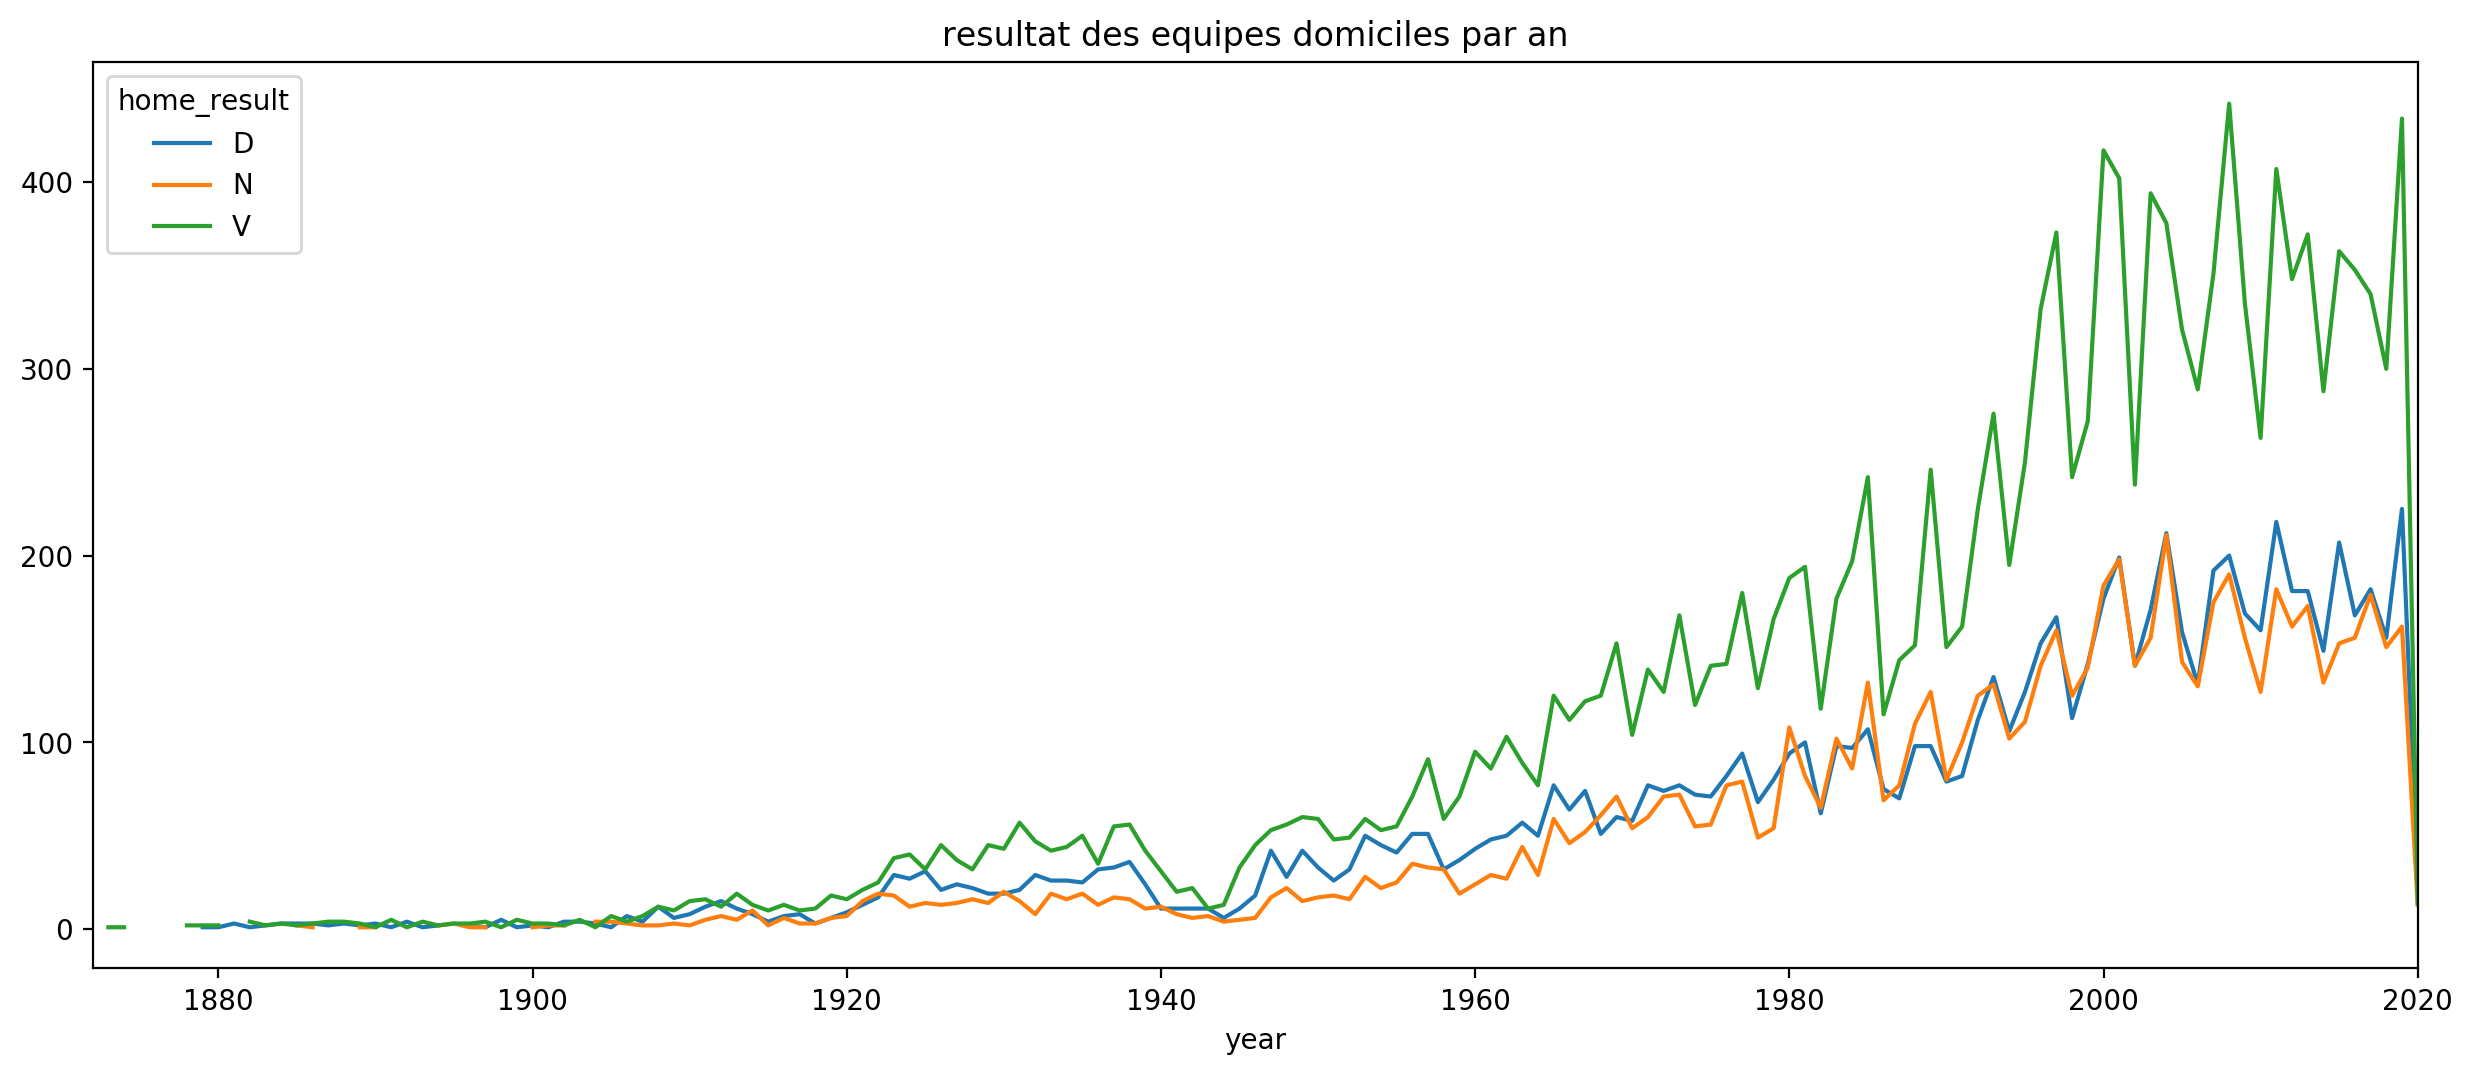

In [78]:
home_resultats.plot(title="resultat des equipes domiciles par an")